In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
from google.colab import files

In [2]:
uploaded= files.upload()

Saving ML_data.csv to ML_data.csv


In [23]:
df = pd.read_csv(io.BytesIO(uploaded['ML_data.csv']))

In [24]:
df = df.drop(['Unnamed: 0'],axis =1)
df.head(5)

,Road_cond,Traffic_cond,curr_speed,opp_dist,vis,time,Recommended
0,good,high,0,0,0,mrn,E
1,good,high,0,0,0,aft,E
2,good,high,0,0,0,evn,E
3,good,high,0,0,0,nig,E
4,good,high,0,0,1,mrn,C


In [27]:
def check_road(i):
    if i == 'good':
        return(1)
    return 0

def check_traffic(i):
    if i =='high':
        return(2)
    elif i =='mod':
        return(1)
    return 0

def check_time(i):
    if i =='mrn':
        return(3)
    elif i =='aft':
        return(0)
    elif i =='evn':
        return(2)
    return 1

df['Road_cond'] =df['Road_cond'].apply(lambda x: check_road(x))
df['Traffic_cond'] = df['Traffic_cond'].apply(lambda x: check_traffic(x))
df['time'] = df['time'].apply(lambda x: check_time(x))


X = df.iloc[:,:-1]
y = df.iloc[:,-1].values

In [28]:
X.head(1)

,Road_cond,Traffic_cond,curr_speed,opp_dist,vis,time
0,0,0,0,0,0,1


In [29]:
from sklearn.preprocessing import LabelEncoder as Le
encoder = Le()
y_enc = encoder.fit_transform(y)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


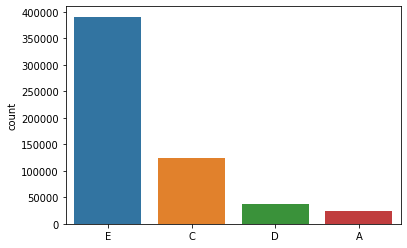

In [48]:
sns.countplot(y)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


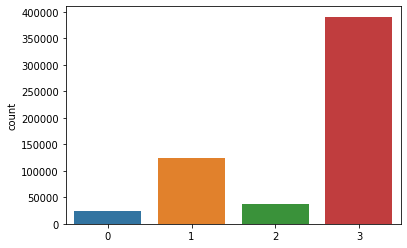

In [49]:
sns.countplot(y_enc)

In [30]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y_enc,test_size = 0.3)

In [31]:
from sklearn.ensemble import RandomForestClassifier as RFC
cls = RFC()

In [32]:
cls.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
pred = cls.predict(X_test)

from sklearn.metrics import accuracy_score as acc
print(acc(y_test,pred))

0.7745543981481482


In [44]:
import pickle
filename = 'finalmodel.pkl'
pickle.dump(cls,open(filename,'wb'))

In [45]:
final_model = pickle.load(open('model.pkl','rb'))

In [50]:
model.predict((X_test.iloc[0,:].values).reshape(1,6))

array([3])